1[ markdown  
2[ А что если использовать Jupyter-notebook как-блокнот?
    минусы: не-хранит изображения.

In [260]:
import pandas as pd
import sys
import seaborn as sns


df = pd.read_csv("a1_california.csv")
sys.getsizeof(df)

216164

In [200]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


Первую часть задания мы успешно выполняли! Только загвоздка... Нам не нужна вся таблица, а лишь один столбец, как это сделать?

In [202]:
df[df['housing_median_age'] < 20]['total_rooms']

4       1241.0
7       2310.0
8       3080.0
13      3936.0
16       570.0
         ...  
2981    4422.0
2984    3239.0
2985    1368.0
2991    4867.0
2997     956.0
Name: total_rooms, Length: 830, dtype: float64

In [203]:
# df[df['housing_median_age'] < 20, ['longitude', 'latitude']]

Не-работает (почемуто)..

In [205]:
df[['longitude', 'latitude', 'housing_median_age']]

,longitude,latitude,housing_median_age
0,-122.05,37.37,27.0
1,-118.30,34.26,43.0
2,-117.81,33.78,27.0
3,-118.36,33.82,28.0
4,-119.67,36.33,19.0
...,...,...,...
2995,-119.86,34.42,23.0
2996,-118.14,34.06,27.0
2997,-119.70,36.30,10.0
2998,-117.12,34.10,40.0


In [206]:
df[['population', 'total_rooms']].median()

population     1155.0
total_rooms    2106.0
dtype: float64

In [207]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


Scatterplot (Точечный график)

<Axes: xlabel='longitude', ylabel='latitude'>

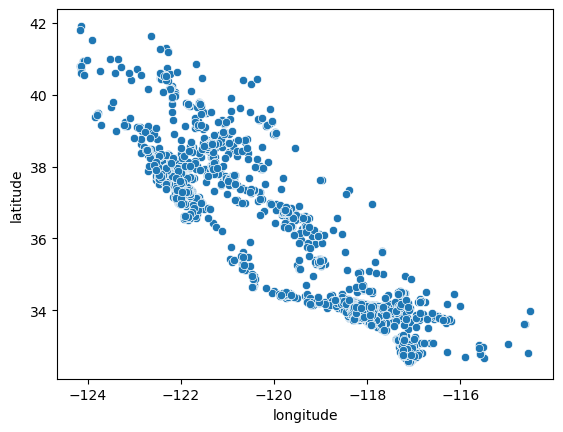

In [209]:
sns.scatterplot(data=df, x="longitude", y="latitude")

Помимо двумерных отношений, мы можем добавить "дополнительное измерение" с помощью цвета. В данном случае опять же достаточно очевидное отношение, чем выше кол-во семей, тем выше кол-во людей и соответственно комнат.

<Axes: xlabel='households', ylabel='population'>

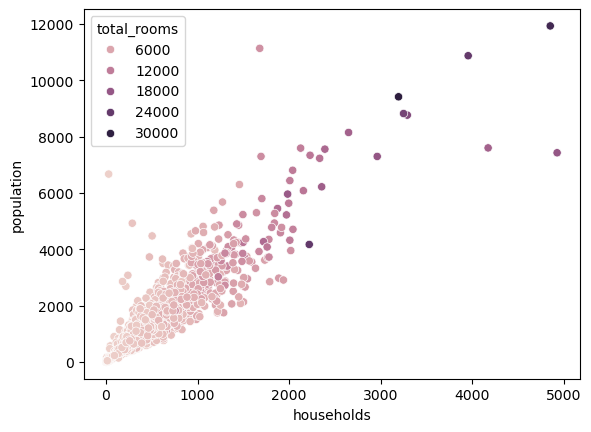

In [211]:
sns.scatterplot(data=df, x="households", y="population", hue="total_rooms")

Помимо обозначения дополнительного измерения цветом мы можем использовать size.

<Axes: xlabel='households', ylabel='population'>

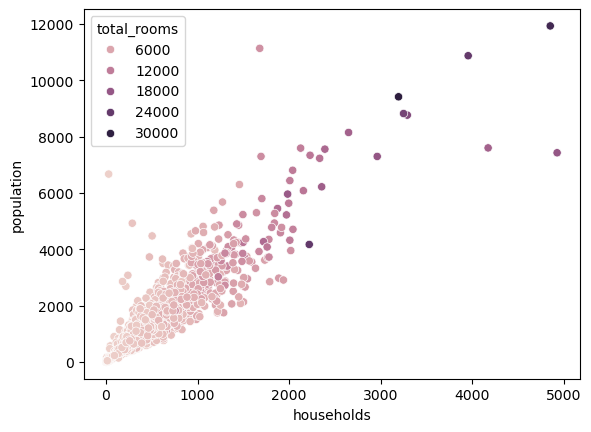

In [213]:
sns.scatterplot(data=df, x="households", y="population", hue="total_rooms")

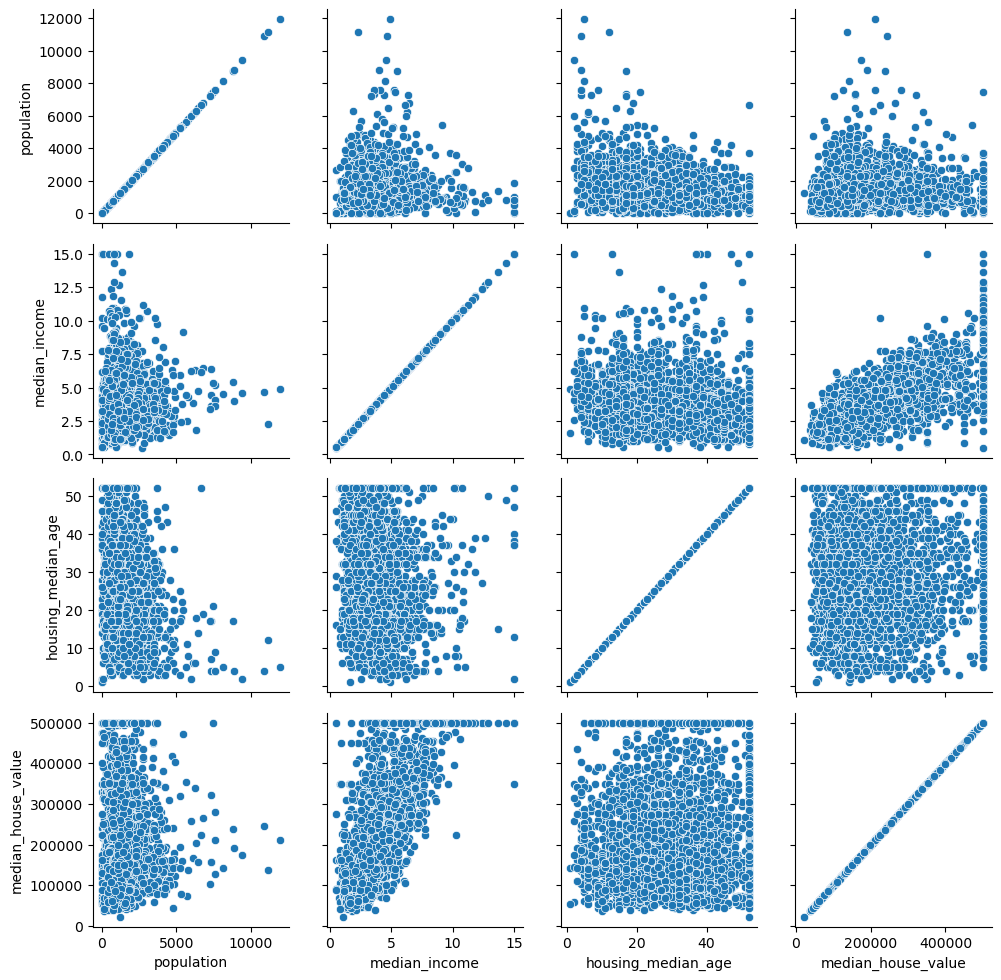

In [214]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

Линейные графики

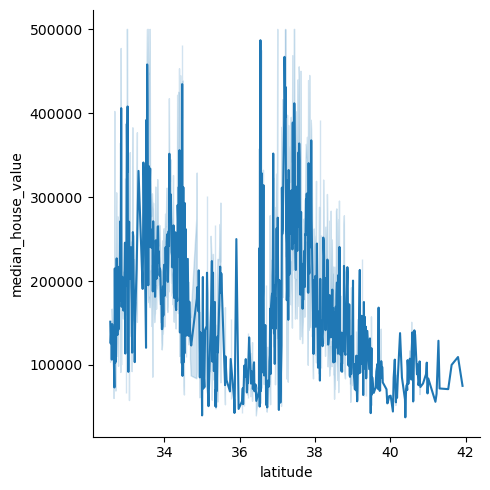

In [216]:
sns.relplot(x="latitude", y="median_house_value", kind="line", data=df)

<Axes: xlabel='median_income', ylabel='Count'>

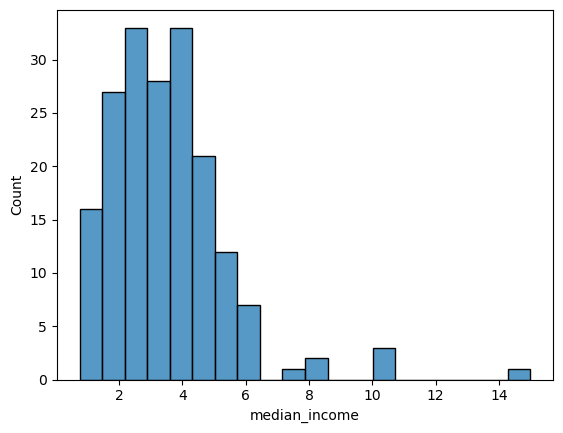

In [217]:
sns.histplot(data=df[df['housing_median_age']>50], x="median_income")

<Axes: xlabel='age_group'>

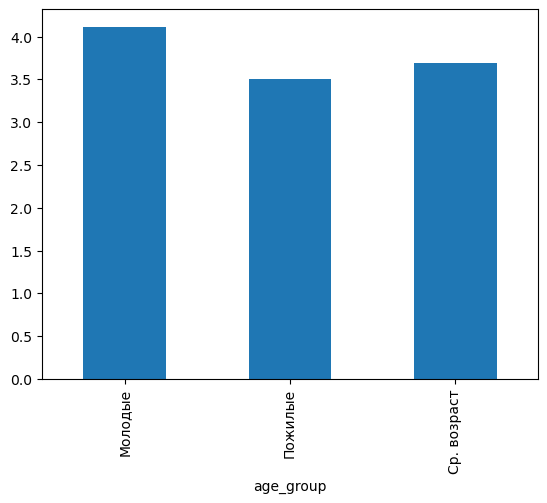

In [218]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <= 50),
'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Пожилые'

df.groupby('age_group')['median_income'].mean().plot(kind='bar')

In [219]:
df[df['age_group'] == 'Молодые']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_group
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,Молодые
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0,Молодые
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0,Молодые
13,-117.03,32.97,16.0,3936.0,694.0,1935.0,659.0,4.5625,231200.0,Молодые
16,-120.81,37.53,15.0,570.0,123.0,189.0,107.0,1.8750,181300.0,Молодые
...,...,...,...,...,...,...,...,...,...,...
2981,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,171300.0,Молодые
2984,-117.59,33.88,13.0,3239.0,849.0,2751.0,813.0,2.6111,107000.0,Молодые
2985,-120.47,34.94,17.0,1368.0,308.0,642.0,303.0,1.8633,109400.0,Молодые
2991,-117.17,34.28,13.0,4867.0,718.0,780.0,250.0,7.1997,253800.0,Молодые


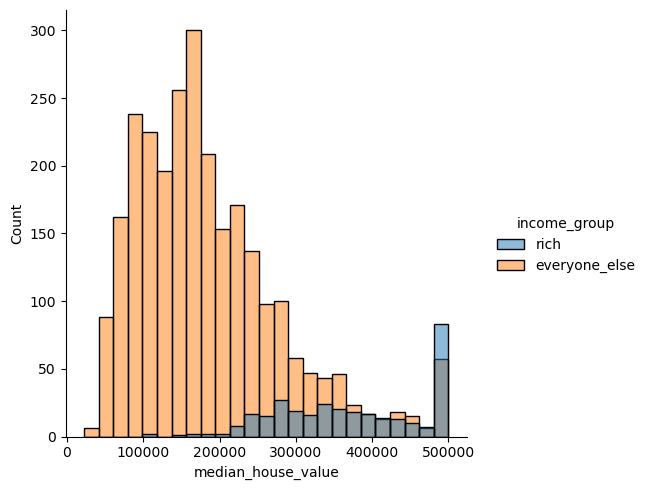

In [220]:
df.loc[df['median_income'] > 6, 'income_group'] = 'rich'
df.loc[df['median_income'] < 6, 'income_group'] = 'everyone_else'
    
sns.displot(df, x="median_house_value", hue="income_group")

In [284]:
df.loc[df['housing_median_age'] < 20, ['housing_median_age', 'total_rooms']]

,housing_median_age,total_bedrooms,total_rooms
4,19.0,244.0,1241.0
7,19.0,471.0,2310.0
8,15.0,617.0,3080.0
13,16.0,694.0,3936.0
16,15.0,123.0,570.0
...,...,...,...
2981,17.0,945.0,4422.0
2984,13.0,849.0,3239.0
2985,17.0,308.0,1368.0
2991,13.0,718.0,4867.0


<Axes: xlabel='housing_median_age'>

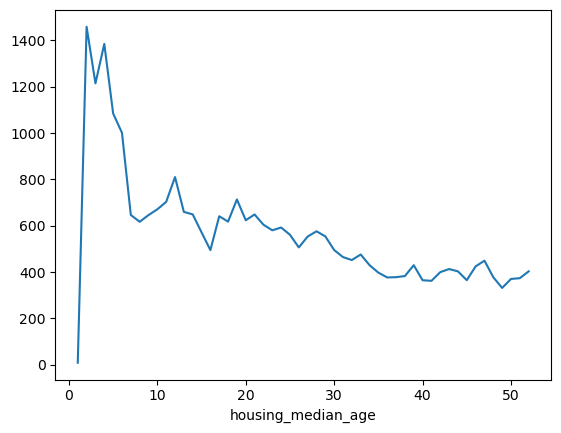

In [306]:
df.groupby('housing_median_age')['total_bedrooms'].mean().plot()